## Fix Spike Dectection in Social Water condition

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt
sns.set_style('ticks')
%matplotlib inline

In [2]:
vol_file = Path('../Voltron_data/Voltron_Log_DRN_Exp.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
# using Path to handle switches filesystems
if platform == "linux" or platform == "linux2":
    dir_folder = Path('/nrs/ahrens/Ziqiang/Takashi_DRN_project/ProcessedData/')
elif platform == 'win32':
    dir_folder = Path('U:\\Takashi') # put folder for windows system
include_inds = np.array([4, 5, 11, 12, 13, 14, 22, 31, 32, 33, 34, 38, 39, 43, 52, 54])
sigma=20;
short_kernel=(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(np.arange(-60,61)**2)/(2*sigma**2))

## Check spike with raw voltron

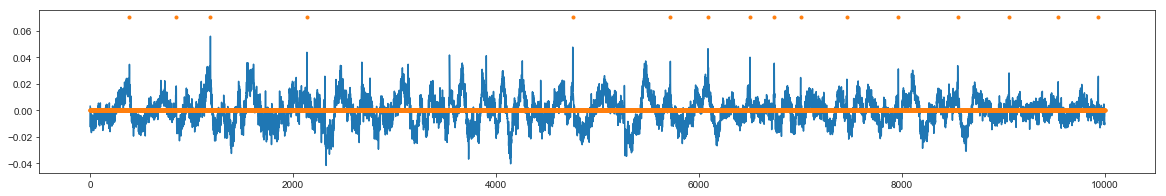

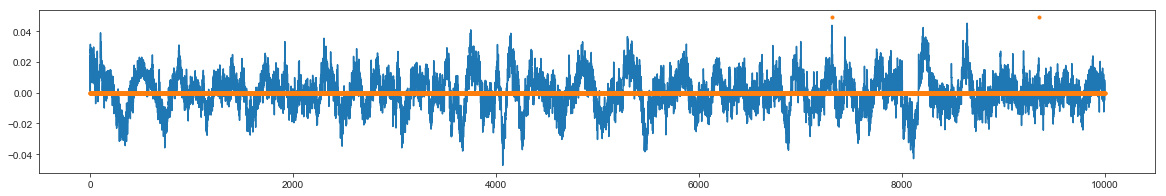

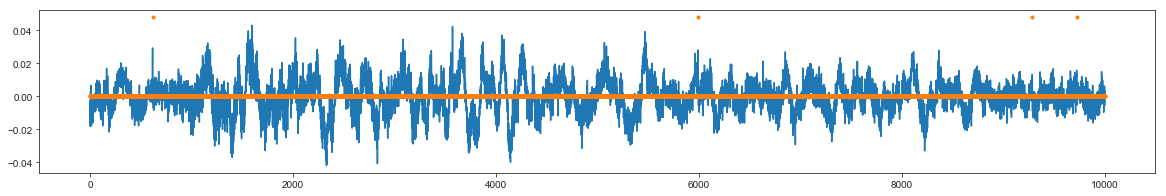

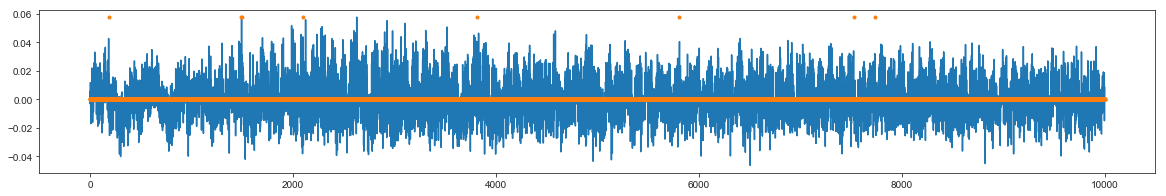

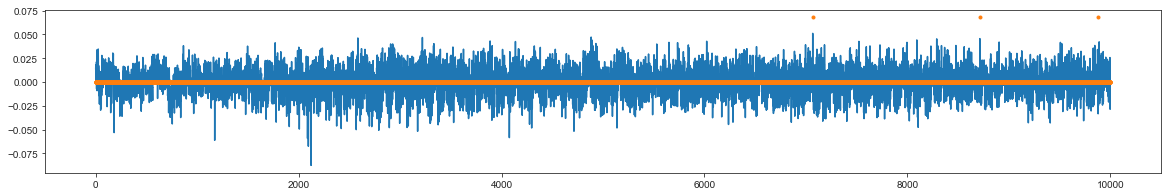

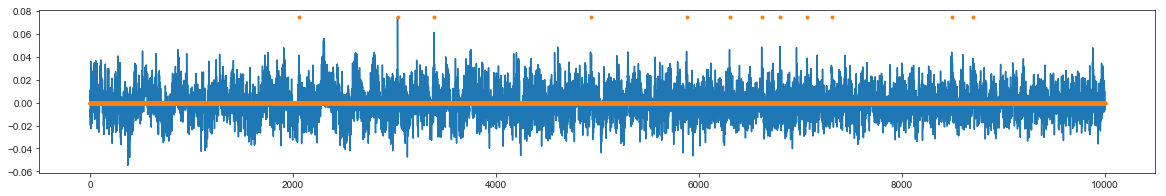

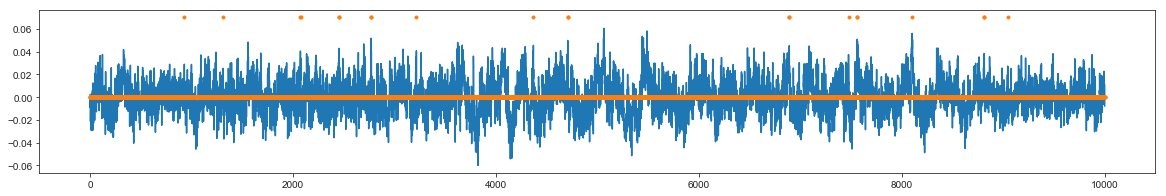

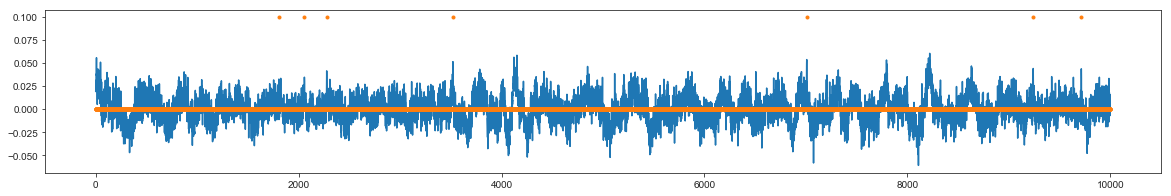

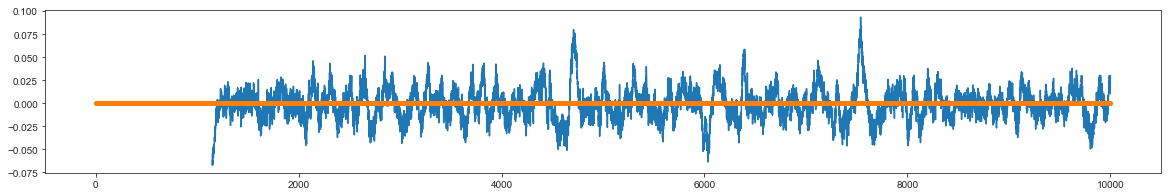

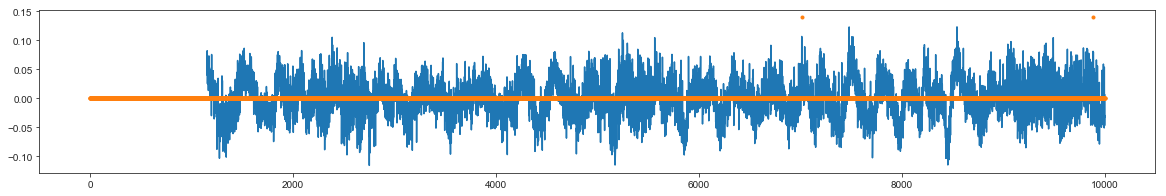

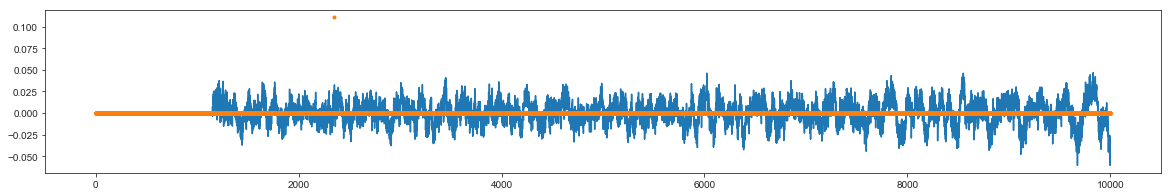

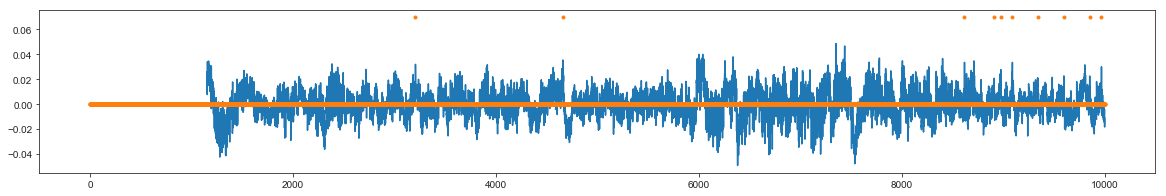

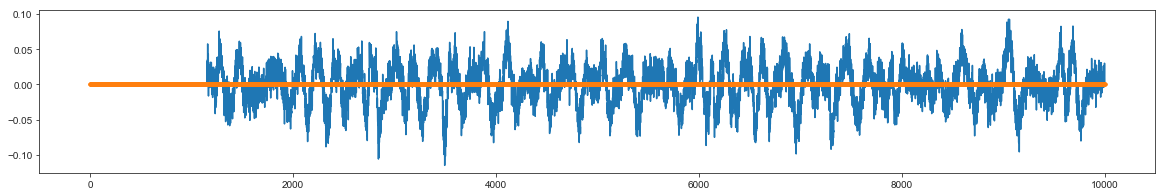

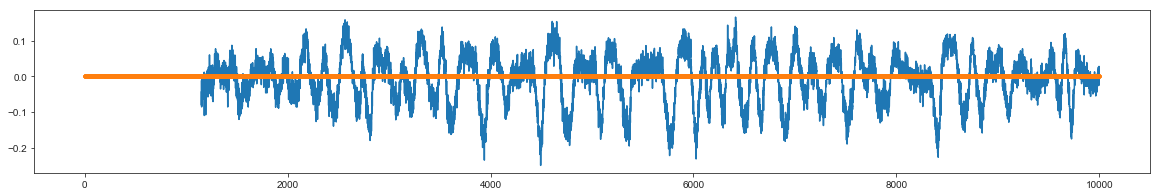

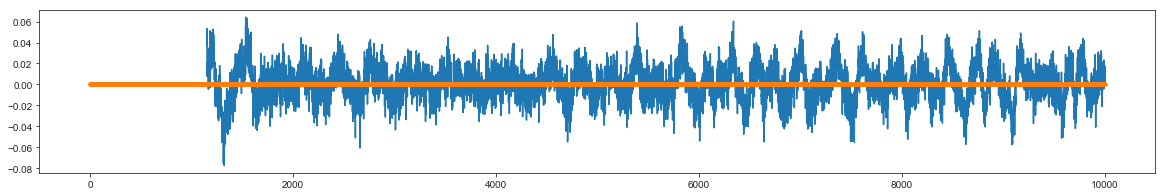

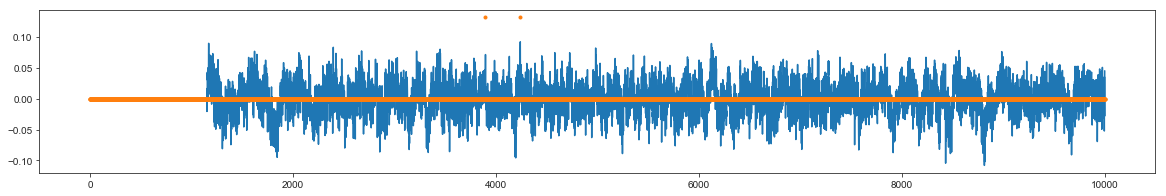

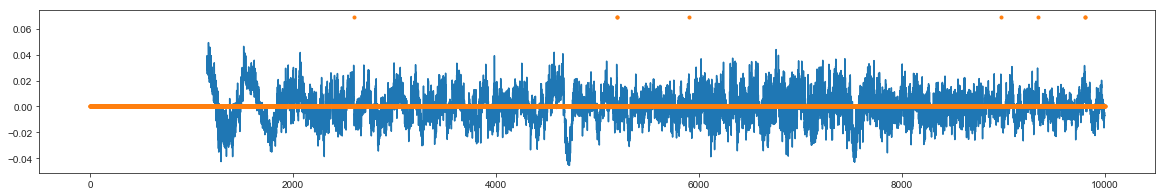

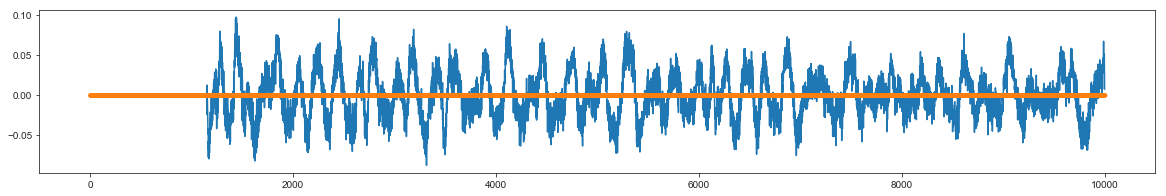

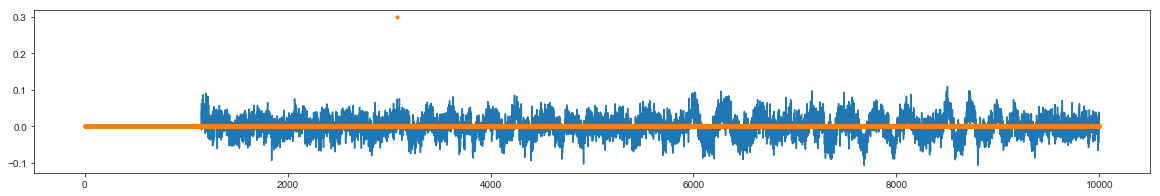

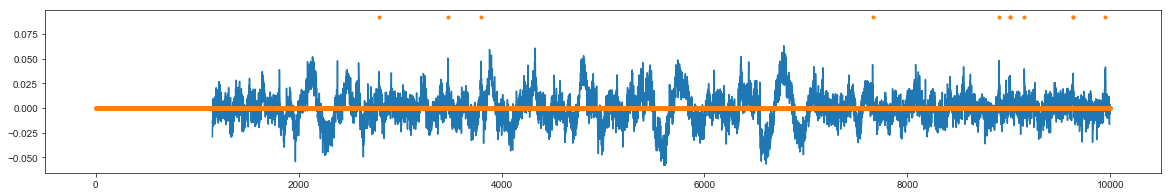

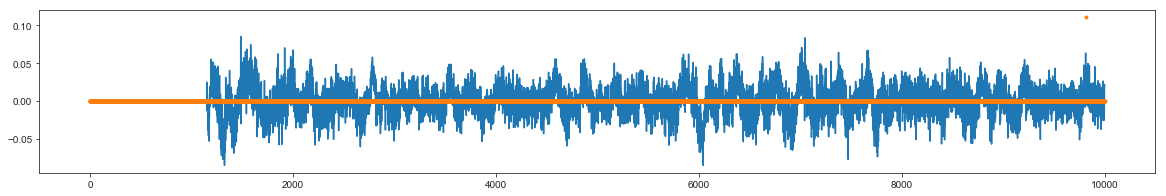

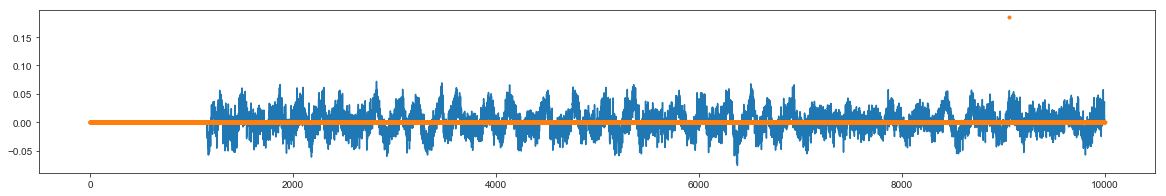

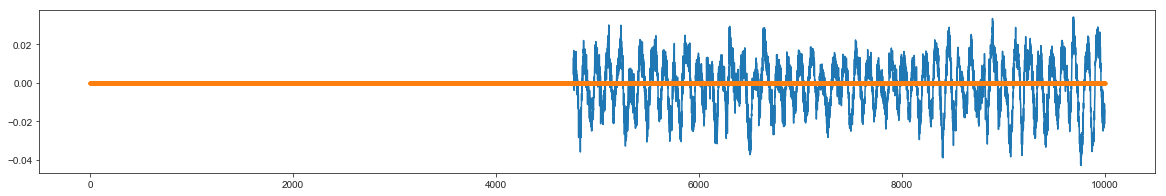

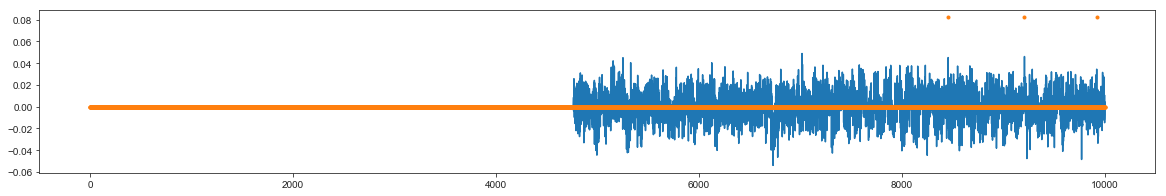

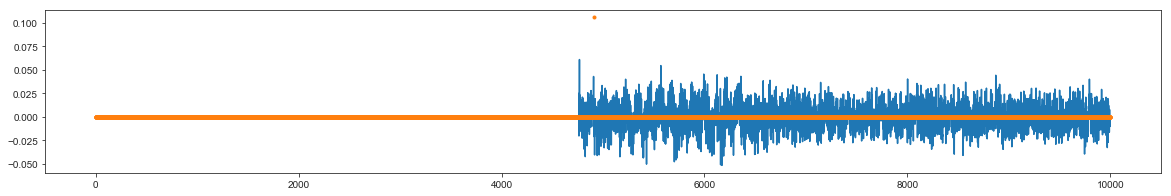

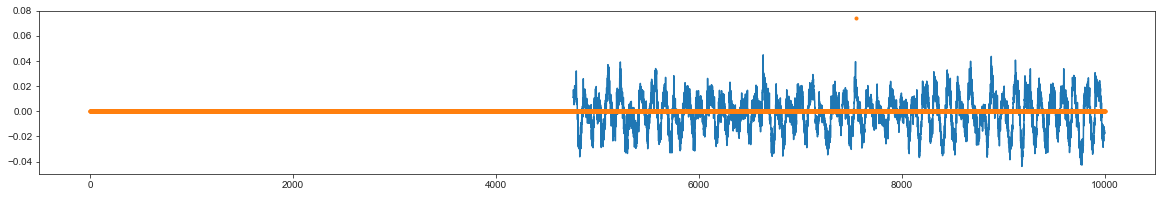

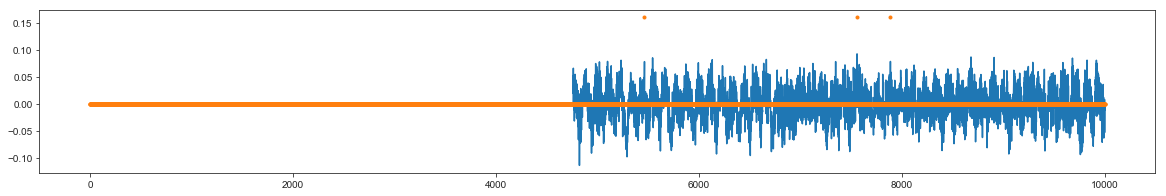

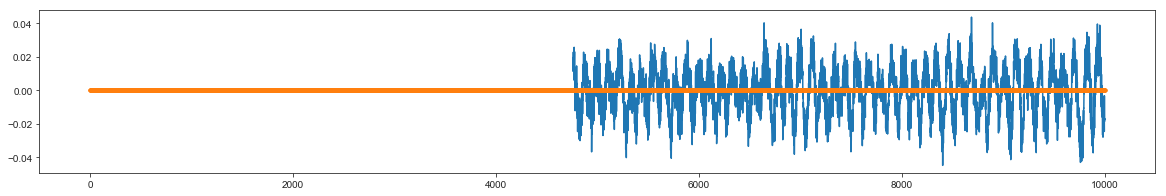

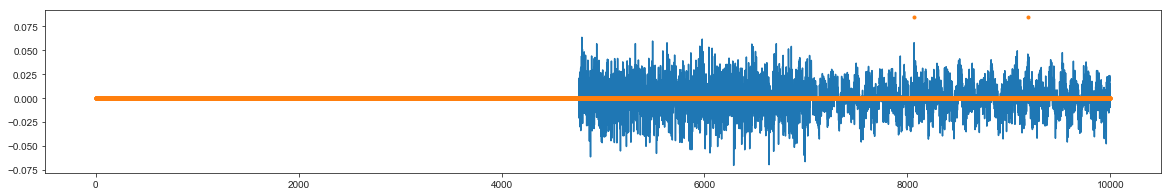

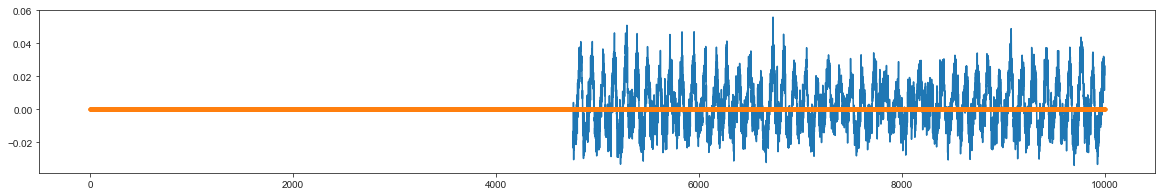

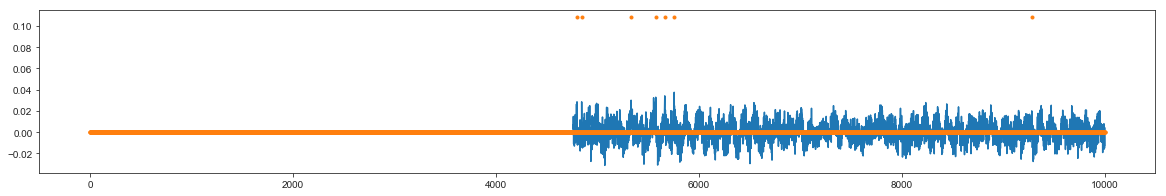

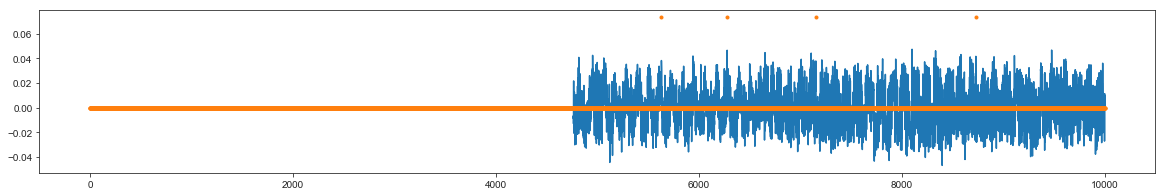

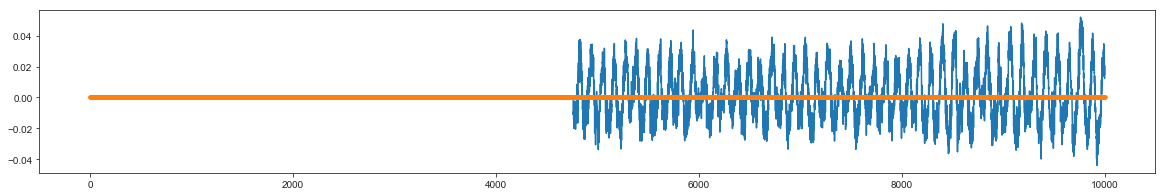

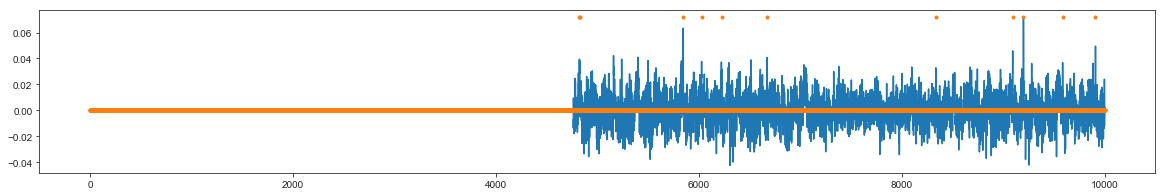

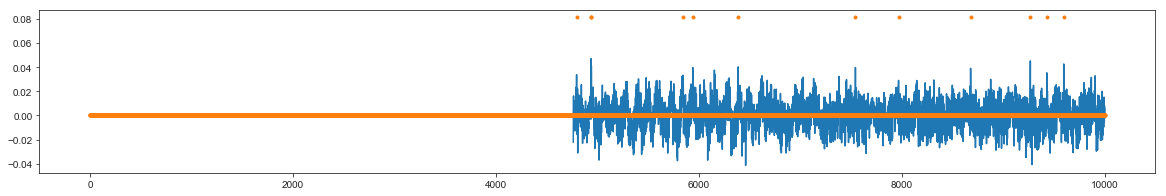

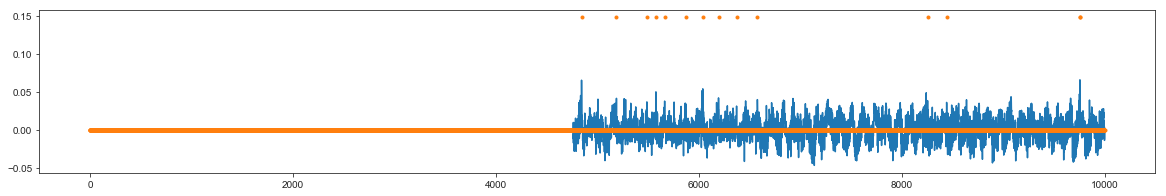

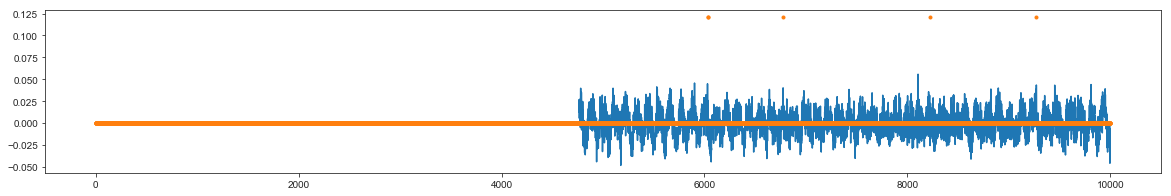

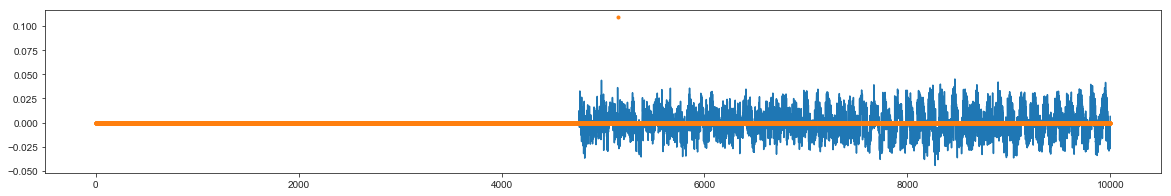

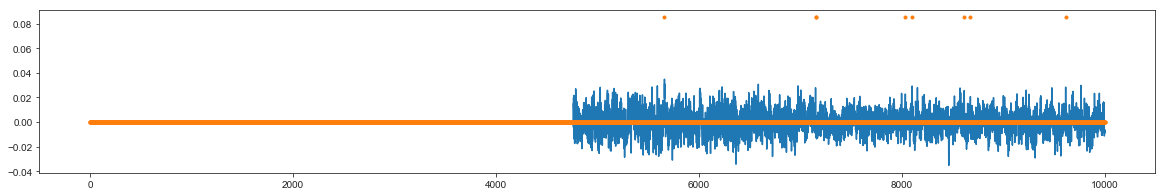

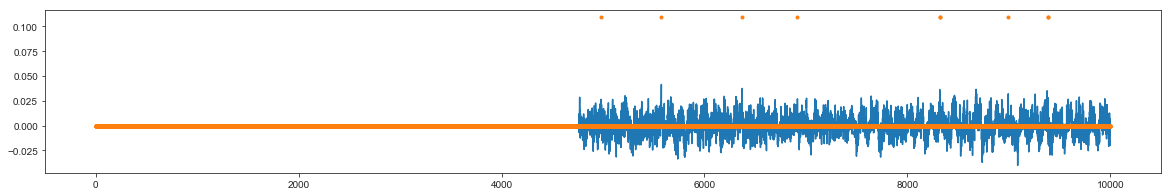

In [3]:
for index, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if task_type[0] != 'S':
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse_series.npy')
    _ = np.load(f'{dat_dir}/Voltr_spikes.npz')
    voltrs = _['voltrs']
    voltrs = voltrs - np.nanmedian(voltrs, axis=-1, keepdims=True)
    num_cell = voltrs.shape[0]
    spk = _['spk']
    spk = np.r_['-1', np.zeros((num_cell, 600)), spk]
    for n_cell in range(num_cell):
        plt.figure(figsize=(20, 3))
        plt.plot(voltrs[n_cell, 30000:40000])
        plt.plot(spk[n_cell, 30000:40000]*np.nanmax(voltrs[n_cell, :]), '.')
        plt.show()

## Check spike with rolling normalized voltron

In [9]:
for index, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if task_type[0] != 'S':
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse_series.npy')
    _ = np.load(f'{dat_dir}/Voltr_spikes.npz')
    voltrs = _['voltr_']
    num_cell = voltrs.shape[0]
    spk = _['spk']
#     for n_cell in range(num_cell):
#         plt.figure(figsize=(20, 3))
#         plt.plot(voltrs[n_cell, :])
#         plt.plot(spk[n_cell, :]*np.nanmax(voltrs[n_cell, :]), '.')
#         plt.show()

## Average spike

In [ ]:
for index, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if task_type[0] != 'S':
        continue
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse_series.npy')
    _ = np.load(f'{dat_dir}/Voltr_spikes.npz')
    voltrs = _['voltr_']
    num_cell = voltrs.shape[0]
    spk = _['spk']
    for n_cell in range(num_cell):
        plt.figure(figsize=(20, 3))
        spk_train = spk[n_cell, :]
        spk_train =
        plt.plot(spk[n_cell, :]*np.nanmax(voltrs[n_cell, :]), '.')
        plt.show()